![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrais e Primitivas

Neste teste, vamos usar os métodos de integração para calcular primitivas de funções.

De forma análoga ao caso de EDOs, vamos retornar dois `np.array`s:
- um com os pontos onde a primitiva foi calculada; e
- outro com o valor da aproximação numérica da primitiva.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 0: o método do retângulo

Para evitar efeitos de bordo e arredondamento, vamos usar o método do retângulo criando pontos com `np.linspace`:

In [17]:
def retangulo(f, a, b, n=1000):
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    F = [f(p)*h for p in pts]
    return sum(F)

Explique porque os pontos criados têm `endpoint=False`

YOUR ANSWER HERE

In [18]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) < 1e-3

In [19]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) > 1e-4

In [20]:
ans = (np.cos(0) - np.cos(2))
assert 1e-5 < abs(retangulo(np.sin, 0, 2, n=10**4) - ans) < 1e-4

# Questão 1: O jeito fácil

Escreva uma função `primitiva_retangulo`,
que calcula a integral de $a$ até cada um dos pontos escolhidos,
**incluindo** $a$,
chamando o método do retângulo para cada um deles.

In [42]:
def primitiva_retangulo(f, a, b, h=0.01):
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)
    Fs = [retangulo(f, a, p, i) for i,p in enumerate(pts)]
    return pts, Fs

In [43]:
pts, Fs = primitiva_retangulo(np.sin, 0, 1)
assert len(Fs) == len(pts)

In [44]:
assert np.allclose(Fs, 1 - np.cos(pts), atol=1e-2)

In [45]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

## Questão 2: Gráficos

Faça os gráficos dos erros de cálculo das primitivas, no intervalo $[0, 1.5]$, das seguintes funções:
- Seno
- Exponencial
- Cosseno

para quatro valores de passo: `1e-2`, `5e-3`, `2e-3` e `1e-3`.

Use 3 eixos, um para cada função, e 4 curvas em cada eixo.

[]

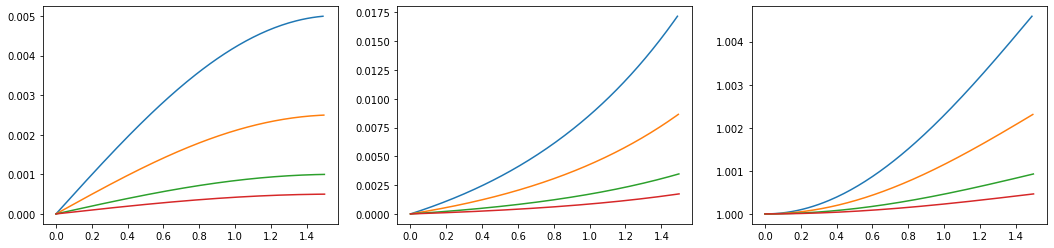

In [25]:
fig, axs = plt.subplots(ncols=3, figsize=(18,4))
hs = [1e-2, 5e-3, 2e-3, 1e-3]

for h in hs:
    xs, Fsin = primitiva_retangulo(np.sin, 0, 1.5, h)
    xs, Fexp = primitiva_retangulo(np.exp, 0, 1.5, h)
    xs, Fcos = primitiva_retangulo(np.cos, 0, 1.5, h)
    
    axs[0].plot(xs, abs(Fsin - (-np.cos(xs) + 1)) )
    axs[1].plot(xs, abs(Fexp - (np.exp(xs) - 1) ) )
    axs[2].plot(xs, abs(Fcos - (np.sin(xs) - 1) ) )
    

plt.plot()

In [11]:
for ax in axs:
    assert len(ax.lines) == 4
    assert len(ax.get_legend().texts) == 4
    assert len(ax.get_title()) > 0

AttributeError: 'NoneType' object has no attribute 'texts'

In [ ]:
for ax in axs:
    for l in ax.lines:
        assert max(np.abs(l.get_ydata())) < 2e-2

Qual o erro, na extremidade final do intervalo, para cada um dos métodos e valores de $h$?

Imprima uma tabela, com 3 colunas e 4 linhas (fora as "de título"), usando `print` formatado.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Como os erros se comportam ao diminuir o passo?  Isso é esperado?

YOUR ANSWER HERE

Como os erros se comportam ao longo do eixo dos $x$, ou seja, ao calcular primitivas "cada vez mais longe"?  Como você explica este fenômeno?

YOUR ANSWER HERE

Como os erros se comportam para as diferentes funções?  Você esperava isso?

YOUR ANSWER HERE

## Questão 3: O jeito mais rápido

Na questão anterior, ao calcular a primitiva de $[a, a+2h]$, era necessário calcular $f(a)$ e $f(a+h)$.
Ora, $f(a)$ já tinha sido calculada para a primitiva em $[a, a+h]$ (era o único termo!),
então podemos evitar estas contas repetidas.

Vamos fazer uma nova primitiva, `primitiva_rapida`, que calcula apenas uma vez `f(pts)`,
e calcula as somas parciais usando [`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html).

Explique porque é ruim (neste caso!) que `np.cumsum` **não** retorne a soma vazia.

In [ ]:
np.cumsum([1,2])

YOUR ANSWER HERE

Para incluir a soma vazia (que vale zero!), use `np.hstack`.

In [ ]:
np.hstack([[0], [1, 3]])

In [37]:
def primitiva_rapida(f, a, b, h=0.01):
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)
    Fs = h*f(pts)
    Fs = np.cumsum(Fs)
    Fs = np.hstack([[0], Fs[:-1]])
    return pts, Fs

In [38]:
pts, Fs = primitiva_rapida(np.sin, 0, 1)
assert len(pts) == len(Fs)

In [39]:
assert np.allclose(Fs, 1 - np.cos(pts), atol=1e-2)

In [40]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

Ambas as funções devem ser (a menos de erro de truncamento / arredondamento) iguais:

In [46]:
_, Fs_original = primitiva_retangulo(np.sin, 0, 1)
assert np.allclose(Fs, Fs_original, atol=1e-15, rtol=1e-15)

## Questão 4: E terá valido a pena?

Observe as duas caixas abaixo

In [ ]:
%time primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%time primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

In [ ]:
%time primitiva_rapida(np.sin, 0, 1, h=1e-4)
%time primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

Quão mais rápido é o método usando `np.cumsum`?

YOUR ANSWER HERE

Agora, observe com mais detalhe:

In [ ]:
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

In [ ]:
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-4)
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

Quantas vezes mais lento é o método "simples" com passo 10 vezes menor?

E quantas vezes mais lento é o método `np.cumsum` com passo 10 vezes menor?

Isso ajuda a explicar as diferenças acima?

YOUR ANSWER HERE